# Lab 2 : DB Scan, and Kmeans

---


Total Points: **45**

Tentative Weightage : **10%**

Submission Deadline :  **$31^{st}$ October 2021 , 23:59 hours**

---



General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a text block) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. You can use any programming language of your choice. In case you prefer any other language than python then you can submit all the code and related files along with detailed pdf report in a zip format on the classroom. In such cases  suitable input format for each of the question and a readme file should precisely tell how to compile and run your program. Give the exact commands with respect to the datasets provided. 
11. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
12. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
13. In case of any queries regarding Lab 2, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**


#1. Adult Dataset

###About the Dataset
The data set contains information of 32562 individuals from the 1994
census, of which 21790 are males and 10771 are females. We choose six attributes as feature set: age, fnlwgt, education_num, capital_gain, hours_per_week, sex. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/adult) 



#2. Spiral Dataset

###About the Dataset
The dataset is synthetically generated contains 5000 datapoints. Each datapoint contains a feature vector of size three denoting x,y coordinate in 2D plane and the last feature denoting the binary class. 



---

**NOTE**: Please use the provided dataset files along with this notebook. The adult dataset is scaled and normalised version of complete dataset available at UCI repository. 

---

In [ ]:
# Perform the necessary imports here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [ ]:
# To access files stored in Google Drive, following block import is used
# If using on a local system, please comment the lines below in this code block

# from google.colab import drive
# drive.mount('/content/MyDrive', force_remount = True)

**TASK 1**:                                                      **(5 Marks)**

1. Download and load the dataset files into pandas dataframe. You can refer to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html). (**1 point**) 
2. Report the total number of samples and the total number of columns in the dataset. (**1 point**)
3. Evaluate the dataset and drop data which hash 'NA' values. Now report the total number of samples and the total number of columns in the dataset. (**1 point**)
4. Plot a bar chart showing the number of samples present for different class. In Adult dataset consider 'sex' to be class labels and in Spiral dataset consider the last binary feature to be class label. (**1 point**)
5. Plot the spiral dataset using matplotlib to check if the datset is spiral or not. Use only first two columns denoting x,y coordinates in 2D plane. (**1 point**)

In [ ]:
# Load the data from csv file into a data frame (1 point)
# Please insert your code here

adult_data = pd.read_csv("adult.csv")
spiral_data = pd.read_csv("spiral.csv")


In [ ]:
# Print the number of instances and attributes in the loaded data frame (1 point)
# Please insert your code here

adult_shape = adult_data.shape
spiral_shape = spiral_data.shape
print("Number of Instances in Adult Dataset is ", adult_shape[0], "and attributes ",adult_shape[1])
print("Number of Instances in Spiral Dataset is ", spiral_shape[0], "and attributes ",spiral_shape[1])


Number of Instances in Adult Dataset is  32561 and attributes  6
Number of Instances in Spiral Dataset is  5000 and attributes  3


In [ ]:
# Drop the columns with NaN values (0.5 points)
# Please insert your code here

adult_data = adult_data.dropna(axis=0)
spiral_data = spiral_data.dropna(axis=0)

In [ ]:
# Print the number of instances and attributes in the loaded data frame after removal of NaN columns (0.5 points)
# Please insert your code here

adult_shape = adult_data.shape
spiral_shape = spiral_data.shape
print("Number of Instances in Adult Dataset is ", adult_shape[0], "and attributes ",adult_shape[1])
print("Number of Instances in Spiral Dataset is ", spiral_shape[0], "and attributes ",spiral_shape[1])

Number of Instances in Adult Dataset is  32561 and attributes  6
Number of Instances in Spiral Dataset is  5000 and attributes  3


Text(0, 0.5, 'Frequency')

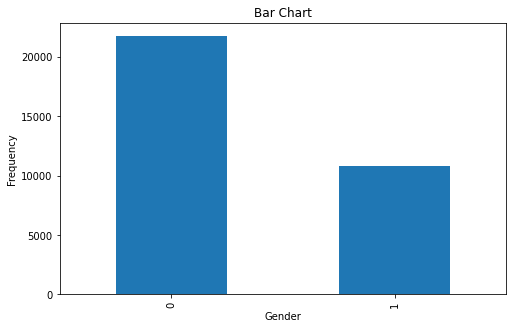

In [ ]:
# Plot a bar chart showing the number of samples for different classes in both dataset (1 point)
# Please insert your code here


ax = adult_data['gender'].value_counts().plot(kind='bar',
                                    figsize=(8,5),
                                    title="Bar Chart")
ax.set_xlabel("Gender")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

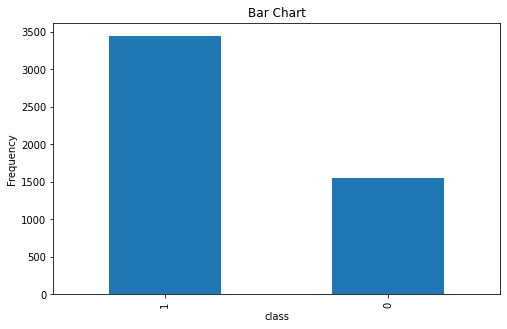

In [ ]:
ax = spiral_data['class'].value_counts().plot(kind='bar',
                                    figsize=(8,5),
                                    title="Bar Chart")
ax.set_xlabel("class")
ax.set_ylabel("Frequency")

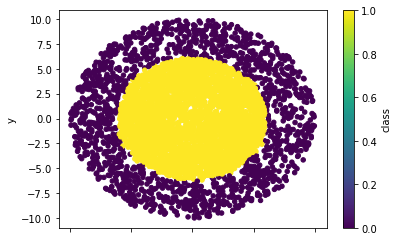

In [ ]:
# Plot a scatter plot for spiral dataset (1 point)
# Please insert your code here

spiral_data.plot.scatter('x', 'y', c='class', colormap='viridis')


In [ ]:
spiral_data = spiral_data.iloc[:,0:2]
print(spiral_data)

            x         y
0     4.41933 -4.364950
1    -1.77464 -6.363290
2    -7.87681 -5.552910
3    -7.67895 -0.044552
4    -8.78107 -3.442720
...       ...       ...
4995  5.84197 -1.213820
4996  2.46677  0.242835
4997 -3.58882  0.462759
4998 -5.82406  0.864777
4999  1.77199  5.381430

[5000 rows x 2 columns]


In [ ]:
gender_data = adult_data.iloc[:,-1]
adult_data = adult_data
print(adult_data)

            age    fnlwgt  education_num  capital_gain  hours_per_week  gender
0      0.019622 -0.022667      -0.680470      0.725976        0.094976       0
1      0.296610 -0.787368      -0.357412      0.402068       -0.051703       0
2     -0.083487 -0.069366       0.479827     -0.822414       -0.285691       0
3      0.636832 -0.021345       0.256530     -0.721425       -0.087912       0
4     -0.393080 -0.017952       0.713519      0.574969       -0.073938       1
...         ...       ...            ...           ...             ...     ...
32556 -0.642387 -0.149353       0.484008      0.564430       -0.110399       1
32557  0.183154 -0.062405      -0.590824     -0.739884       -0.257021       0
32558  0.927796 -0.023090      -0.233823     -0.273761       -0.095099       1
32559 -0.577725 -0.786633       0.052733     -0.199630       -0.069348       0
32560  0.416587 -0.015003       0.393786     -0.177885        0.799700       1

[32561 rows x 6 columns]
            age    fnlwgt 

### Comments on Task 1

---
Number of Instances in Adult Dataset is  32561 and attributes  6
Number of Instances in Spiral Dataset is  5000 and attributes  3

Dataset 1: Spiral Dataset
* Adult dataset has more number of points and has more attributes than spiral dataset.
* In adult dataset, gender is the main class
* Both the dataset doesnt have any NaN value.
* Spiral dataset in plot looks like elliptical.
* The two class of spiral dataset are like concurent ellipses. one from centre to radius1 and the second one from radius 1 to radius 2.

---
**End of Task 1**


---



**TASK 2: DBSCAN**  
                                                     **(6+2+2=10 Marks)**
1. Implement the clustering algorithm DBSCAN on both the datasets. 
2. Compare the two datasets in terms of sum of the squared error and time taken on both datasets. 
3. Plot the obtained clusters for number of cluster ($k$=2).
3. Compare the performance of algorithm on the given datasets with different $k$ values and prepare a detailed observation in the suitable comment box.
4. Which value of K that is best suited based on the sum of squared error metric. Write your general observation and reason for the same. [The answer will be evaluated based on your observations and not any fixed pre-defined value]

**NOTE:<br> 1. Take different $k$ values as 2,5,10,20 and report your obervation.<br> 2. Dont include the sex feature and class label feature in adult and spiral dataset respectively for this task. Thus use 5 features in adult and 2 features in spiral dataset.**


### Implementation of Task 2 on each dataset
##### **(3+3=6 Marks)**

In [ ]:
#Implement the DBSCAN on both datasets   6 points                      
# Please insert your code here


import numpy as np
import math



class dbscan:
  minpts=0
  epsilion=0
  data = np.array([])
  output = np.array([])
  cluster_id = 1

  def dist(self, x,y):
    sub = x-y
    ans=int(0)
    for i in range(len(sub)):
      ans=ans+sub[i]*sub[i]
    ans = math.sqrt(ans) 
    return ans

  def neighbor_points(self, pointId):
    points = []
    len_of_data = len(self.data)
    for i in range(len_of_data):
        if not self.dist(self.data[i], self.data[pointId]) >= self.epsilion:
            points.append(i)
    rt_pts = np.asarray(points)
    return rt_pts


  def create_cluster(self, resCluster, pointId, cluster_id,):
    points = self.neighbor_points(pointId)
    points = points.tolist()
    # q = queue.Queue() int
    q=[]

    if len(points) < self.minpts:
        resCluster[pointId] = 0
        return False
    else:
        resCluster[pointId] = cluster_id
    for point in points:
        if resCluster[point] == -1:
            q.append(point)
            resCluster[point] = cluster_id

    while len(q)>0:
        neighbors = self.neighbor_points(q[0])
        q.pop(0)
        if len(neighbors) >= self.minpts:                      
            for i in neighbors:
                if resCluster[i] == -1:
                    q.append(i)
                    resCluster[i] = cluster_id
                elif resCluster[i] == 0:
                    resCluster[i] = cluster_id
    return True




  def calculate_sse(self):
    assignedCluster = {x:[] for x in range(self.cluster_id)}

    for i in range(len(self.output)):
      if self.output[i]!=0:
        assignedCluster[self.output[i]].append(i)
    sse = 0

    for index in assignedCluster:
        clust_tp = assignedCluster[index]
        if len(clust_tp)==0:
          continue
        dimension = len(self.data[clust_tp[0]])
        temp_sum = [0]*dimension
        cluster_tp_len = len(clust_tp)
        for pnt in clust_tp:
            for j in range(dimension):
                temp_sum[j] += self.data[pnt][j]
        
        for j in range(dimension):
            temp_sum[j]=temp_sum[j]/cluster_tp_len
        
        for pnt in clust_tp:
            diff = 0
            for j in range(dimension):
                diff += (temp_sum[j] - self.data[pnt][j])
            
            sse += diff**2
        
    return sse


  def __init__(self, data, epsilion, minpts):
    self.epsilion=epsilion
    self.minpts=minpts
    self.data=data
    cluster_id = 1
    nPoints = len(self.data)
    resCluster = [-1] * nPoints
    for pointId in range(nPoints):
        if resCluster[pointId] == -1:
            if self.create_cluster(resCluster, pointId, cluster_id):
                cluster_id+=1

    self.output = np.asarray(resCluster)
    self.cluster_id = cluster_id
    return
  



# """


### Plot for Task 2 on both datasets
##### **(1+1=2 Marks)**

In [ ]:
#Plot for k=2 clusters obtained clusters on both dataset   2 points                      
# Please insert your code here

eps = [0.2, 0.4, 0.5, 0.6,]
mnpt = [5, 10, 20, 30]

arr = spiral_data.to_numpy()
sse_eps = []
sse_mnpt = []
for ep in eps:
  out = dbscan(arr, ep, 10)
  sse_eps.append(out.calculate_sse())
  print("SSE for epsilion value =",ep, "is ", out.calculate_sse())

for mnp in mnpt:
  out = dbscan(arr, 0.4, mnp)
  sse_mnpt.append(out.calculate_sse())
  print("SSE for Minpts value =",mnp, "is ", out.calculate_sse())



SSE for epsilion value = 0.2 is  3.3510165421238503
SSE for epsilion value = 0.4 is  64394.3124416853
SSE for epsilion value = 0.5 is  64892.437285740285
SSE for epsilion value = 0.6 is  66578.15107459176
SSE for Minpts value = 5 is  65353.990894713796
SSE for Minpts value = 10 is  64394.3124416853
SSE for Minpts value = 20 is  642.1288567166065
SSE for Minpts value = 30 is  1.8686015251714283


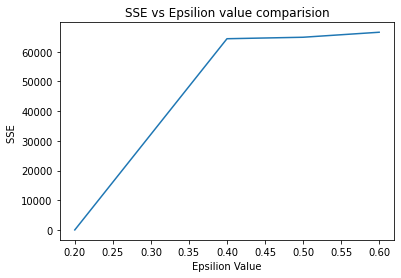

In [ ]:
plt.plot(eps, sse_eps)
plt.xlabel("Epsilion Value")
plt.ylabel("SSE ")
plt.title("SSE vs Epsilion value comparision")
plt.show()

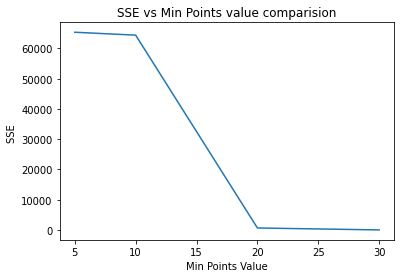

In [ ]:
plt.plot(mnpt, sse_mnpt)
plt.xlabel("Min Points Value")
plt.ylabel("SSE ")
plt.title("SSE vs Min Points value comparision")
plt.show()

In [ ]:
import time
start = time.time()

arr = adult_data.iloc[:,:-1].to_numpy()
out = dbscan(arr, 0.1, 10)
end = time.time()
print("Time Taken by adult dataset is ", end-start)


start = time.time()
arr = spiral_data.to_numpy()
out = dbscan(arr, 0.4, 10)
out.calculate_sse()
end = time.time()
print("Time Taken by Spiral dataset is ", end-start)

Time Taken by adult dataset is  5994.034352064133
Time Taken by Spiral dataset is  114.95545363426208


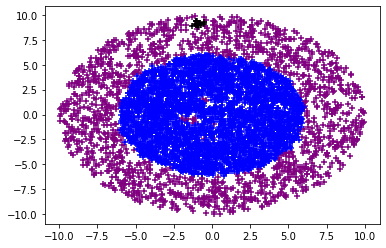

In [ ]:
colors = ['purple', 'blue', 'black', 'green','orange', 'brown', 'yellow', 'red',]
arr = spiral_data.to_numpy()
out = dbscan(arr, 0.4, 12)
number_of_clust = out.cluster_id
clusters = out.output

for i in range(number_of_clust):
    color = colors[i % 8]
    x1 = []
    y1 = []
    for j in range(len(arr)):
        if clusters[j] == i:
            x1.append(arr[j][0])
            y1.append(arr[j][1])
    plt.scatter(x1, y1, c=color, alpha=1, marker='+')

### Comments on Task 2          
##### **(2 Marks)**

---

* As Epsilion increases, Number of core points increases.
* As Minpts decreases as number of core point increases.
* Bases on SSE vs parameter, we can choose optimal value of minpts and k. 

For Spiral Dataset:  best value as per above graph seems to be 
Epsilon = 0.4 and Minpts = 12 as these give more sse. 


It took enormous time to cluster Adult dataset 5994 seconds while it just took 114 second in Spiral dataset.

Time taken by dbscan is proportional to points(and number of attribs) in dataset.


---
**End of Task 2**


---



## A) **$k$-means Clustering**

$k$-means is very well studied problem in the domain of unsupervised machine learning. It is also sometimes called Vanilla $k$-means or standard $k$-means algorithm. The goal of algorithm is to select $k$ centers and obtain the partioning of the dataset X such that the datapoints are nearest to each center they are assigned. The objective cost of the final clustering obtained is given by 
$$L_p(X, C, \phi) = \left(\sum_{x \in  X }\sum_{j \in [k] } \mathbb{I}(\phi(x) =j)d(x,c_j)^2\right)^\frac{1}{2}
 $$ where $\mathcal{C} = \{C_1, C_2, \ldots, C_k\}$ denotes clusters with centers $C = \{c_j\}_{j=1}^{k}$, $d(.)$ is euclidean distance metric , $\phi$ is cluster assignment and $\mathbb{I}$ is indicator function which helps in checking if datapoint $x$ belongs to $j^{th}$ cluster.<br>
 

It is basically the squared sum of euclidean distance between each point and assigned center. For further details refer **Lecture Notes**

##B)  **Fair $k$-means Clustering**
Machine Learning is being studied in both supervised and unsupervised settings. The decision taken by these algorithms have societal impact on the humans. So if any such decision is biased towards a particular type of people it will lead to catastropic effects on the life of affected individuals. Many such reallife scenarios like automated resume processing of amazon, and US criminal risk prediction etc. have been found to biased towards certain groups of socities like females, or individuals belonging to certain race (black). Thus there is need of fair machine learning algorithms.<br>
In **Supervised** setting, fairness is very well studied problem. In unsupervised setting many new algorithms are coming up to deal with fairness issues and reduce the biasness. <br>
In **Unsupervised** settings like $k$-means clustering the fairness is being studied in two aspects namely:<br><br>
1.**Group Fairness Notion** - deals with the fairness in terms of complete group of points in the cluster. It tries to maintain the ratio of every type of individual within each cluster. eg. If we have 100 datapoints (70 Males + 30 Females) to train upon. Then group fairness tries to capture this ratio within each formed cluster. In simple words,it tries to maintain the ratio of males:females in each cluster to be 70:30 ie 7:3 . <br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To achieve this each center might have to loose some of good points that are intially close to it so as to maintain the ratio. Thus there will be increase in objective cost as compared to vanilla $k$-means clustering.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In order to check whether the obtained clusters are fair or not what one can do is to calculate the value of fairness metric known as **Balance** which can be computed using the given formula:

$$Balance(X,C,\phi) = \min_{j \in \mathcal{C}}\left( 
 \min\left( \frac{\sum_{x \in X:\phi(x)=j}\mathbb{I}{(\rho_i=a)}}{\sum_{x \in X:\phi(x)=j}\mathbb{I}{(\rho_i=b)}}, \frac{\sum_{x \in X:\phi(x)=j}\mathbb{I}{(\rho_i=b)}}{\sum_{x \in X:\phi(x)=j}\mathbb{I}{(\rho_i=a)}} \right)
\right)$$ where $\rho_i$ is the protected attribute of $i^{th}$ data instance and $\rho_i$ can take value $a$ or $b$ in case of binary valued attribute.<br>
<br>
The formula mainly tells us that we need to find the minimum of (a/b , b/a) for each cluster then among these obtained minimas we will report the overall minimum as the balance for complete clustering set obtained.<br><br>
**Takeaway for assignment:** *In our case a and b are two possible values of protected group like male and female.* <br>
*In your assignment so basically you need to find the ratio of male/female or female/male for each cluster, store these in some array and then find the minimum of this array. This final minimum will be the balance. In dataset you can assume male being denoted by 1 and female being denoted by 0*<br><br>

2.**Individual Fairness Notion** -  deals with the fairness with regards to each individual in the space. On similar grounds as balance, one can check the individual fairness in obtained clustering using the metric given by :

$$MaxD(X,C,\phi) = \min_{j \in \mathcal{C}}\left( 
 \min\left( \frac{\max_{x \in X:\phi(x)=j,\ \rho_i=a} d(x,c_j)}{\max_{x \in X:\phi(x)=j,\ \rho_i=b} d(x,c_j)}, \frac{\max_{x \in X:\phi(x)=j,\ \rho_i=b} d(x,c_j)}{\max_{x \in X:\phi(x)=j,\ \rho_i=a} d(x,c_j)} \right)
\right)$$
<br><br>
It basically tries to find the minimum of ( Farthest_male_point_distance /Farthest_female_point_distance ) in each cluster ans then overall metric is minima of these obtained values over k cluster. 

**Takeaway for assignment:**<br> *In your assignment so basically you need to find the minimum of $p=\frac{(farthest\ distance\ of\ male\ point\ in\ cluster)}{(farthest\ distance\ of\ female\ point\ in\ cluster)}$ or $p^{-1}$  for each cluster, store these in some array and then find the minimum of these obtained k sized array. This final minimum will be the maxD.*<br><br>




**TASK 4: Fair $k$-means Clustering**  
                                                     **(19 Marks)**<br><br>
**NOTE:** This task is to be done only on **Adult** dataset.
1. Implement the $k$-means clustering algorithm.
2. While performing $k$-means clustering on adult dataset use only five attributes as feature set: age, fnlwgt, education_num, capital_gain, hours_per_week. 
3. Use the attribute sex as protected (sensitive) attribute for fairness.
4. Calculate the objective cost for different k values. 
4. Calculate the fairness metrics ie. balance and MaxD for set of clusters obtained against different $k$ values. To be more precise, store the value of both metric in a array for different $k$ values. Print these value array obtained
5. Plot the variation of objective cost, balance and maxD over different $k$ values.
6. Comment your observation. Also tell your observation which fairness notion is more beneficial and should be focused upon? Can you think of some other notion of fairness in clustering?


**NOTE: Take different $k$ values as 2,5,10,20 to report your obervation.**

In [ ]:
#Implement the kmeans algorithm        10 points 
# Please insert your code here

import numpy as np
import math 
import random
import copy
import matplotlib.pyplot as plt


class kmeans:
  k = 2
  data = np.array([])
  outputCluster = []
  outputMean = []

  def initializeCenters(self):
    random_indices = random.sample(range(len(self.data)), self.k)
    centers=[]
    for i in range(self.k):
      centers.append(self.data[random_indices[i]])
    return centers

  def dist(self, x,y):    
    sub = x-y    
    ans=int(0)    
    for i in range(len(sub)-1):      
      ans=ans+sub[i]*sub[i]    
      ans = math.sqrt(ans)     
      return ans

  def assign_cluster(self, cluster_means):
    clusters={}
    for i in range(self.k):
      clusters[i]=[]

    for pt in self.data:
      min_dis = 100000
      for ind in range(len(cluster_means)):
        min_dis = min(min_dis, self.dist(pt, cluster_means[ind]))
        if min_dis == self.dist(pt, cluster_means[ind]):
          temp_cluster = ind
      clusters[temp_cluster].append(pt)

    return clusters

  def assign_mean(self, cluster):
    new_means = []
    for c in cluster:
      if len(cluster[c])!=0:
        sumls = [0]*len(cluster[c][0])
        for i in range(len(cluster[c])):
          for j in range(len(cluster[c][0])):
            sumls[j]+=cluster[c][i][j]
          
        for j in range(len(cluster[c][0])):
          sumls[j]=sumls[j]/len(cluster[c])
        new_means.append(sumls)
    return new_means


  def create_list_data(self):
    map_data = {}
    for i in len(self.data):  
      map_data[self.data[i]]=i
    return map_data

  def calculate_sse(self):
    total_sum = 0;
    for i in range(self.k):
        for j in range(len(self.outputCluster[i])):
            diff = 0
            for d in range(len(self.outputCluster[i][0])):
                diff += (self.outputCluster[i][j][d] - self.outputMean[i][d])
            total_sum += diff**2
    
    return total_sum


  def calculate_balance(self):
    balance_list = []
    for i in range(self.k):
      cntMale=0.01
      cntFemale=0.01
      for j in self.outputCluster[i]:
          if j[-1]==1.0:
            cntMale+=1
          else:
            cntFemale+=1
      balance_list.append(cntMale/cntFemale)
    
    print("Balance list  is ", balance_list)  
    return min(balance_list)

  def calculate_fairness(self):
    fairness = []
    # create_list_data
    for i in range(self.k):
        max_female_dist=float('-inf')
        max_male_dist=float('-inf')
        for j in self.outputCluster[i]:
            if j[-1]==1.0:
              max_male_dist = max(max_male_dist, self.dist(j, self.outputMean[i]))
            else:
              max_female_dist = max(max_female_dist, self.dist(j, self.outputMean[i]))
        fairness.append(max_male_dist/max_female_dist)
    print("fairness matrix is ", fairness)
    return min(fairness)
        
  def __init__(self, data, k):
    self.data = data
    self.k = k

    cluster = {x:[] for x in range(k)}
    cluster_mean = self.initializeCenters()
    new_means = cluster_mean
    max_iter = 10000
    while max_iter>0:
      max_iter-=1
      cluster = self.assign_cluster(cluster_mean)
      prev_mean=cluster_mean
      new_mean = self.assign_mean(cluster)
      # print(prev_mean)
      # print(new_mean)
      prevNP = np.asarray(prev_mean)
      newNP = np.asarray(new_mean)
      newNP = np.absolute(newNP-prevNP)

      if np.sum(newNP)<=0:
        break

      cluster_mean=new_mean
    self.outputCluster=cluster
    self.outputMean = new_mean


        

    




#Calculate the fairness metrics and print       5 points for calculation of all three metrics and  1 point for printing
# Please insert your code

dat = adult_data.to_numpy()
outp = kmeans(dat, 3)
print("Objective value is ",outp.calculate_sse())
print("Balance value is ",outp.calculate_balance())
print("Fairness value is ",outp.calculate_fairness())
# print(outp.)



## Plot the variation over different k values     3 points 
# Please insert your code

k_val = [2,5,10,20]
fairness_list =[]
objective_list =[]
balance_list =[]
dat = adult_data.to_numpy()

for kval in k_val:
  outp = kmeans(dat, kval)
  print("For k is ",kval)
  objective_list.append(outp.calculate_sse())
  balance_list.append(outp.calculate_balance())
  fairness_list.append(outp.calculate_fairness())
  print("\n")
  

"""
dat = spiral_data.to_numpy()
k_val = [2,3,5,10]
for kvl in k_val:
  outp = kmeans(dat, kvl)
"""

Objective value is  28203.72863144526
Balance list  is  [0.6487445366672958, 0.3864679421367051, 0.44851713869860727]
Balance value is  0.3864679421367051
fairness matrix is  [0.9886182027222228, 0.9993650950598898, 0.9991370466259792]
Fairness value is  0.9886182027222228
For k is  2
Balance list  is  [0.5629355803110335, 0.4217043618205876]
fairness matrix is  [0.9916038698211957, 0.9994122151932922]


For k is  5
Balance list  is  [0.3935112065902514, 0.47773690730244595, 0.5915055124566516, 0.6917734671098998, 0.37588634223054657]
fairness matrix is  [0.9975283923042341, 0.9987307041195153, 0.9988935842184447, 0.9799799473904429, 0.9964742343663493]


For k is  10
Balance list  is  [0.6812264998669686, 0.7136106052091726, 0.479150829058084, 0.39216745497956707, 0.5240638600536222, 0.4412160083606895, 0.352050012452459, 0.398864278177416, 0.394649980246473, 0.6861830125569842]
fairness matrix is  [0.997982678941079, 0.9606566848271704, 0.9999723800691697, 0.9944456850202971, 0.99751

'\ndat = spiral_data.to_numpy()\nk_val = [2,3,5,10]\nfor kvl in k_val:\n  outp = kmeans(dat, kvl)\n'

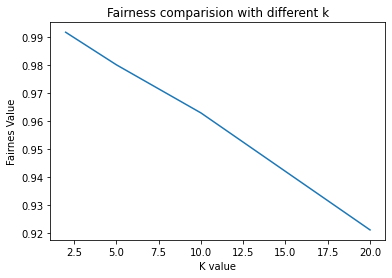

In [ ]:
plt.plot(k_val, fairness_list, label="fairness")
plt.xlabel("K value")
plt.ylabel("Fairnes Value")
plt.title("Fairness comparision with different k")
plt.show()

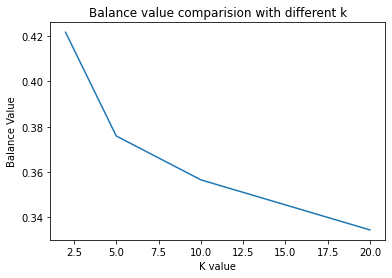

In [ ]:
plt.plot(k_val, balance_list)
plt.xlabel("K value")
plt.ylabel("Balance Value")
plt.title("Balance value comparision with different k")
plt.show()

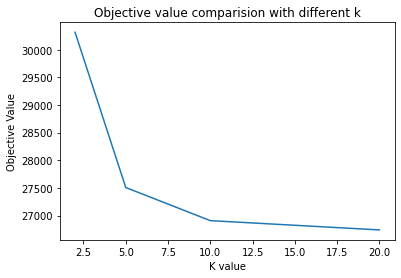

In [ ]:
plt.plot(k_val, objective_list)
plt.xlabel("K value")
plt.ylabel("Objective Value")
plt.title("Objective valu comparision with different k")
plt.show()

### Comments on Task 4          
##### **( Marks)**

---

Observations of Kmeans on Adult Dataset and in general

* As the K increases Objective value or squared sum decreases. First big steps and then smoth out to a specific value.
* Balance value also decrease as k increases but in much more gradual manner.
* Fairness or MaxD also decreases as we K increases but it is much more in linear manner.
* Balance looks better parameter than MaxD as balance considers mulitple points in cluster and so isnt affected by outlier if any. whereas MaxD is prone to outlier for error.

---
**End of Task 4**


---



**TASK 5: Observation**
**(0.5 + 0.5 =1 Marks)**   
 
#### Which out of $k$-means and DBSCAN algorithm do you think is best suited for the given datasets ?



Spiral Dataset:
For Spiral Dataset, DBScan works better as in spiral dataset is consists of classes based on densities and are not gausian. Kmeans will work poorly on spiral dataset.

Adult Dataset:
In adult dataset, with having multiple features and kmeans seems to work much better and faster. As adult dataset has more point than spiral dataset, even then the time performance of kmeans of adult dataset was very fast then DBscan algorithm. As Kmeans uses connected neighbour methodology it is better for adult dataset.


---
**End of Task 5**


---

